### EDA

In [64]:
pip install nltk collections pandas matplotlib 

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install python-csv

  Using cached python-csv-0.0.13.tar.gz (26 kB)
  Preparing metadata (setup.py) ... done
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Using cached xmltodict-0.13.0-py2.py3-none-any.whl (10.0 kB)
  Using cached demjson-2.2.4.tar.gz (131 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      error in demjson setup command: use_2to3 is invalid.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter
import os
import cv2

ModuleNotFoundError: No module named 'cv2'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV files and corresponding store names
csv_files = [
    ('scrapeo/products_kitchencenter.csv', 'kitchencenter'),
    ('scrapeo/products_chemist.csv', 'chemist'),
    ('scrapeo/products_grandvision.csv', 'grandvision'),
    ('scrapeo/products_allnutrition.csv', 'allnutrition'),
    ('scrapeo/products_newera.csv', 'newera'),
    ('scrapeo/products_tupperware.csv', 'tupperware')
]

# Initialize an empty DataFrame for the merged data
merged_data = pd.DataFrame()

# Iterate over the CSV files
for file, store_name in csv_files:
    # Load the CSV file and add the store name as the first column
    data = pd.read_csv(file)
    data.insert(0, 'Store', store_name)
    
    # Append the data to the merged DataFrame
    merged_data = merged_data.append(data, ignore_index=True)

# Save the merged data to a new CSV file
merged_data.to_csv('merged_products.csv', index=False)

/var/folders/c2/c_b6_4l14cqd87ry5bl1vywm0000gn/T/ipykernel_14678/2814919782.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
/var/folders/c2/c_b6_4l14cqd87ry5bl1vywm0000gn/T/ipykernel_14678/2814919782.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
/var/folders/c2/c_b6_4l14cqd87ry5bl1vywm0000gn/T/ipykernel_14678/2814919782.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
/var/folders/c2/c_b6_4l14cqd87ry5bl1vywm0000gn/T/ipykernel_14678/2814919782.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

In [40]:
# Load CSV file
df = pd.read_csv('merged_products.csv',
                 lineterminator='\n')

           Store                                              title  \
0  kitchencenter  Cafetera Ariete Metal Espresso Professional Cofee   
1  kitchencenter                              Cafetera Vintage Blue   
2  kitchencenter              Tostador Ariete Vintage 4 Slices Blue   
3  kitchencenter             Tostador Ariete Vintage 4 Slices Beige   
4  kitchencenter                           Kit Ariete Vintage Beige   

                                         description  \
0  La cafetera Ariete está diseñada para los am...   
1  La cafetera Ariete Vintage Blue 00M134205AR0 e...   
2  Experimente la vanguardia de la innovación y ...   
3  Experimente la vanguardia de la innovación y ...   
4  Vuelve a la elegancia y originalidad de los an...   

                                              images   price  
0  https://cdn.shopify.com/s/files/1/0500/5121/96...  2199.0  
1  https://cdn.shopify.com/s/files/1/0500/5121/96...   369.0  
2  https://cdn.shopify.com/s/files/1/0500/5121/

In [43]:
# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

# Obtener información general del DataFrame
print("\nInformación del DataFrame:")
print(df.info())

# Calcular estadísticas descriptivas del DataFrame
print("\nEstadísticas descriptivas del DataFrame:")
print(df.describe())

# Contar la cantidad de valores únicos en cada columna
print("\nCantidad de valores únicos por columna:")
print(df.nunique())

Primeras filas del DataFrame:
           Store                                              title  \
0  kitchencenter  Cafetera Ariete Metal Espresso Professional Cofee   
1  kitchencenter                              Cafetera Vintage Blue   
2  kitchencenter              Tostador Ariete Vintage 4 Slices Blue   
3  kitchencenter             Tostador Ariete Vintage 4 Slices Beige   
4  kitchencenter                           Kit Ariete Vintage Beige   

                                         description  \
0  La cafetera Ariete está diseñada para los am...   
1  La cafetera Ariete Vintage Blue 00M134205AR0 e...   
2  Experimente la vanguardia de la innovación y ...   
3  Experimente la vanguardia de la innovación y ...   
4  Vuelve a la elegancia y originalidad de los an...   

                                              images   price  
0  https://cdn.shopify.com/s/files/1/0500/5121/96...  2199.0  
1  https://cdn.shopify.com/s/files/1/0500/5121/96...   369.0  
2  https://cdn.sh

## Largo de los títulos - Frecuencia de palabras

In [24]:
# Calcular el promedio del largo del título en caracteres

average_length_all = df['title'].str.len().mean()
average_lengths_by_store = df.groupby('Store')['title'].apply(lambda x: x.str.len().mean())

print(f"Cantidad promedio de caracteres en el título df: {average_length_all:.2f}")
print("\nCantidad promedio de caracteres en el título por tienda:")
print(average_lengths_by_store)

Cantidad promedio de caracteres en el título df: 43.07

Cantidad promedio de caracteres en el título por tienda:
Store
allnutrition     35.373993
chemist          16.740741
grandvision      37.085714
kitchencenter    31.194030
newera           52.993000
tupperware       22.994975
Name: title, dtype: float64


In [57]:
# Ahora promedio de largo de palabras del título

average_word_count_all = df['title'].str.split().apply(len).mean()
average_word_counts_by_store = df.groupby('Store')['title'].apply(lambda x: x.str.split().apply(len).mean())

# Imprimir los resultados
print(f"Cantidad promedio de palabras en el título de df: {average_word_count_all:.2f}")
print("\nCantidad promedio de palabras en el título por tienda:")
print(average_word_counts_by_store)

Cantidad promedio de palabras en el título de df: 6.90

Cantidad promedio de palabras en el título por tienda:
Store
allnutrition     5.974684
chemist          2.592593
grandvision      6.071429
kitchencenter    5.063433
newera           8.316500
tupperware       3.773869
Name: title, dtype: float64


## Count de palabras en los títulos

In [55]:
# Descargar los recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Obtener una lista de palabras vacías (stop words)
stop_words = set(stopwords.words('english'))

# Concatenar todos los títulos en una sola cadena
all_titles = ' '.join(df['title'])

# Tokenizar los títulos en palabras individuales
words = nltk.word_tokenize(all_titles)

# Filtrar las palabras vacías (stop words)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Calcular la frecuencia de cada palabra
word_freq = Counter(words)

# Ordenar las palabras por frecuencia de mayor a menor
sorted_word_freq = word_freq.most_common()

# Imprimir la frecuencia de cada palabra
for word, freq in sorted_word_freq:
    print(f'{word}: {freq}')

cerrada: 1004
mlb: 980
de: 655
lmb: 446
new: 347
york: 241
los: 238
angeles: 199
yankees: 198
ml: 194
elástica: 192
para: 191
caps: 172
playera: 170
manga: 170
corta: 169
day: 166
cap: 166
snapback: 164
game: 159
sox: 150
dodgers: 150
collection: 147
chicago: 141
strapback: 141
gr: 136
city: 132
x: 129
armazones: 124
jersey: 120
san: 113
sudadera: 113
nfl: 107
original: 102
eco: 95
mujer: 89
era: 89
red: 88
white: 88
boston: 87
fdv: 86
nba: 84
lentes: 83
negra: 82
sol: 76
diablos: 73
méxico: 71
draft: 70
francisco: 69
home: 68
lb: 67
giants: 67
rojos: 66
drop: 66
del: 65
sidepatch: 63
pack: 61
series: 61
vintage: 60
black: 59
protein: 59
tabs: 59
league: 59
tupperware: 58
green: 57
away: 57
niña: 57
niño: 57
logo: 56
mexico: 56
mg: 54
armed: 52
forces: 52
atlanta: 50
metallic: 49
blue: 48
whey: 48
unofficial: 47
azul: 47
braves: 47
training: 46
detroit: 46
dbyd: 45
padres: 44
retro: 43
verde: 43
spring: 43
diego: 43
tigers: 43
set: 42
tigres: 42
l: 41
looney: 41
tunes: 41
athletics: 41

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gonzalomordecki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gonzalomordecki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Largo de las descripciones

In [26]:
# Calcular el promedio del largo de las descripciones en caracteres

average_length_all = df['description'].str.len().mean()
average_lengths_by_store = df.groupby('Store')['description'].apply(lambda x: x.str.len().mean())

print(f"Cantidad promedio de caracteres en las descripciones de todo df: {average_length_all:.2f}")
print("\nCantidad promedio de caracteres en el descripciones por tienda:")
print(average_lengths_by_store)

Cantidad promedio de caracteres en las descripciones de todo df: 350.88

Cantidad promedio de caracteres en el descripciones por tienda:
Store
allnutrition     316.877880
chemist          568.222222
grandvision      553.809524
kitchencenter    372.414179
newera           267.685500
tupperware       706.814070
Name: description, dtype: float64


In [58]:
import pandas as pd

# Ahora promedio de largo de palabras del título

# Verificar el tipo de datos antes de calcular la longitud de palabras en la columna 'description'
average_word_count_all = df['description'].apply(lambda x: len(str(x).split())).mean()
average_word_counts_by_store = df.groupby('Store')['description'].apply(lambda x: x.apply(lambda y: len(str(y).split())).mean())

# Imprimir los resultados
print(f"Cantidad promedio de palabras en la descripción de df: {average_word_count_all:.2f}")
print("\nCantidad promedio de palabras en la descripción por tienda:")
print(average_word_counts_by_store)

Cantidad promedio de palabras en la descripción de df: 57.35

Cantidad promedio de palabras en la descripción por tienda:
Store
allnutrition      48.833142
chemist           86.518519
grandvision       80.552381
kitchencenter     60.522388
newera            47.327000
tupperware       109.984925
Name: description, dtype: float64


## Count de palabras en las descripciones

In [60]:
# Descargar los recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Obtener una lista de palabras vacías (stop words)
stop_words = set(stopwords.words('english'))

# Convertir los valores de la columna "description" a cadenas de texto
df['description'] = df['description'].astype(str)

# Concatenar todas las descripciones en una sola cadena
all_descriptions = ' '.join(df['description'])

# Tokenizar las descripciones en palabras individuales
words = nltk.word_tokenize(all_descriptions)

# Filtrar las palabras vacías (stop words)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Calcular la frecuencia de cada palabra
word_freq = Counter(words)

# Ordenar las palabras por frecuencia de mayor a menor
sorted_word_freq = word_freq.most_common()

# Imprimir la frecuencia de cada palabra
for word, freq in sorted_word_freq:
    print(f'{word}: {freq}')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gonzalomordecki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gonzalomordecki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


de: 16364
la: 7655
el: 6561
en: 5960
los: 4615
con: 4118
del: 2817
un: 2765
para: 2672
new: 2286
que: 2216
ya: 2177
esta: 2057
era: 2027
presenta: 1839
logotipo: 1519
bordado: 1508
frontales: 1426
paneles: 1425
mlb: 1409
tu: 1393
gorra: 1344
parte: 1181
una: 1106
es: 975
producto: 974
se: 965
al: 958
logo: 891
su: 854
trasera: 806
las: 744
lado: 707
equipo: 656
derecho: 594
cual: 571
te: 563
lente: 563
por: 557
mm: 548
nivel: 526
juego: 522
puede: 499
sin: 486
estilo: 465
detalles: 458
forma: 457
grandvision: 418
adicionales: 392
lmb: 386
parche: 386
beneficios: 385
tus: 377
yankees: 375
incluyen: 373
cualquier: 367
batterman: 367
este: 364
utilizar: 362
como: 359
cuidados: 355
cap: 339
frente: 338
tipo: 336
especificaciones: 331
sobre: 322
lo: 309
beisbol: 306
liga: 304
alimentos: 302
capacidad: 301
ventajas: 299
day: 293
sidepatch: 284
dodgers: 283
medio: 282
piel: 278
ideal: 274
sox: 274
york: 254
mexicana: 254
otro: 252
sello: 252
permite: 251
antes: 251
uso: 248
nfl: 245
mundial: 

## Cantidad de productos por tienda


Cantidad de productos por tienda:
newera           2000
allnutrition      869
tupperware        398
kitchencenter     268
grandvision       210
chemist            27
Name: Store, dtype: int64


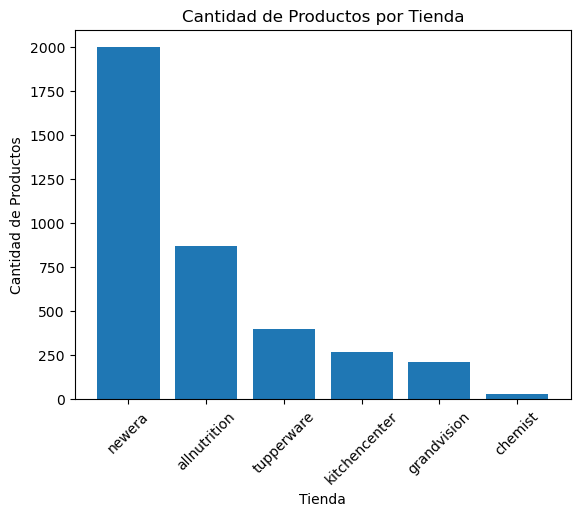

In [44]:
# Calcular la cantidad de productos por tienda
product_count_by_store = df['Store'].value_counts()
print("\nCantidad de productos por tienda:")
print(product_count_by_store)

# Contar la cantidad de productos por tienda
product_count_by_store = df['Store'].value_counts()

# Crear un histograma con la cantidad de productos por tienda
plt.bar(product_count_by_store.index, product_count_by_store.values)
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Productos')
plt.title('Cantidad de Productos por Tienda')
plt.xticks(rotation=45)
plt.show()